In [1]:
# -*- coding: utf-8 -*-

In [2]:
!python --version
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.3/spark-3.1.3-bin-hadoop3.2.tgz
!tar xf spark-3.1.3-bin-hadoop3.2.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.3-bin-hadoop3.2"

Python 3.8.15


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
plt.rcParams ['font.sans-serif'] ='SimHei'              
plt.rcParams ['axes.unicode_minus']=False               
sns.set_style("darkgrid",{"font.sans-serif":[ 'Arial']})
#plt.rcParams['font.sans-serif'] = ['KaiTi']

In [16]:
dataCountries = pd.read_csv('/content/countries_gdp.csv')
dataCountries.info()
data=dataCountries.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [21]:
data.columns = (["country","region","population","area","density","coastline_area_ratio","net_migration","infant_mortality","gdp_per_capita",
                  "literacy","phones","arable","crops","other","climate","birthrate","deathrate","agriculture","industry",
                  "service"])



In [22]:
data.country = data.country.astype('category')

data.region = data.region.astype('category')

data.density = data.density.astype(str)
data.density = data.density.str.replace(",",".").astype(float)

data.coastline_area_ratio = data.coastline_area_ratio.astype(str)
data.coastline_area_ratio = data.coastline_area_ratio.str.replace(",",".").astype(float)

data.net_migration = data.net_migration.astype(str)
data.net_migration = data.net_migration.str.replace(",",".").astype(float)

data.infant_mortality = data.infant_mortality.astype(str)
data.infant_mortality = data.infant_mortality.str.replace(",",".").astype(float)

data.literacy = data.literacy.astype(str)
data.literacy = data.literacy.str.replace(",",".").astype(float)

data.phones = data.phones.astype(str)
data.phones = data.phones.str.replace(",",".").astype(float)

data.arable = data.arable.astype(str)
data.arable = data.arable.str.replace(",",".").astype(float)

data.crops = data.crops.astype(str)
data.crops = data.crops.str.replace(",",".").astype(float)

data.other = data.other.astype(str)
data.other = data.other.str.replace(",",".").astype(float)

data.climate = data.climate.astype(str)
data.climate = data.climate.str.replace(",",".").astype(float)

data.birthrate = data.birthrate.astype(str)
data.birthrate = data.birthrate.str.replace(",",".").astype(float)

data.deathrate = data.deathrate.astype(str)
data.deathrate = data.deathrate.str.replace(",",".").astype(float)

data.agriculture = data.agriculture.astype(str)
data.agriculture = data.agriculture.str.replace(",",".").astype(float)

data.industry = data.industry.astype(str)
data.industry = data.industry.str.replace(",",".").astype(float)

data.service = data.service.astype(str)
data.service = data.service.str.replace(",",".").astype(float)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country               227 non-null    category
 1   region                227 non-null    category
 2   population            227 non-null    int64   
 3   area                  227 non-null    int64   
 4   density               227 non-null    float64 
 5   coastline_area_ratio  227 non-null    float64 
 6   net_migration         224 non-null    float64 
 7   infant_mortality      224 non-null    float64 
 8   gdp_per_capita        226 non-null    float64 
 9   literacy              209 non-null    float64 
 10  phones                223 non-null    float64 
 11  arable                225 non-null    float64 
 12  crops                 225 non-null    float64 
 13  other                 225 non-null    float64 
 14  climate               205 non-null    float64 
 15  birthr

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

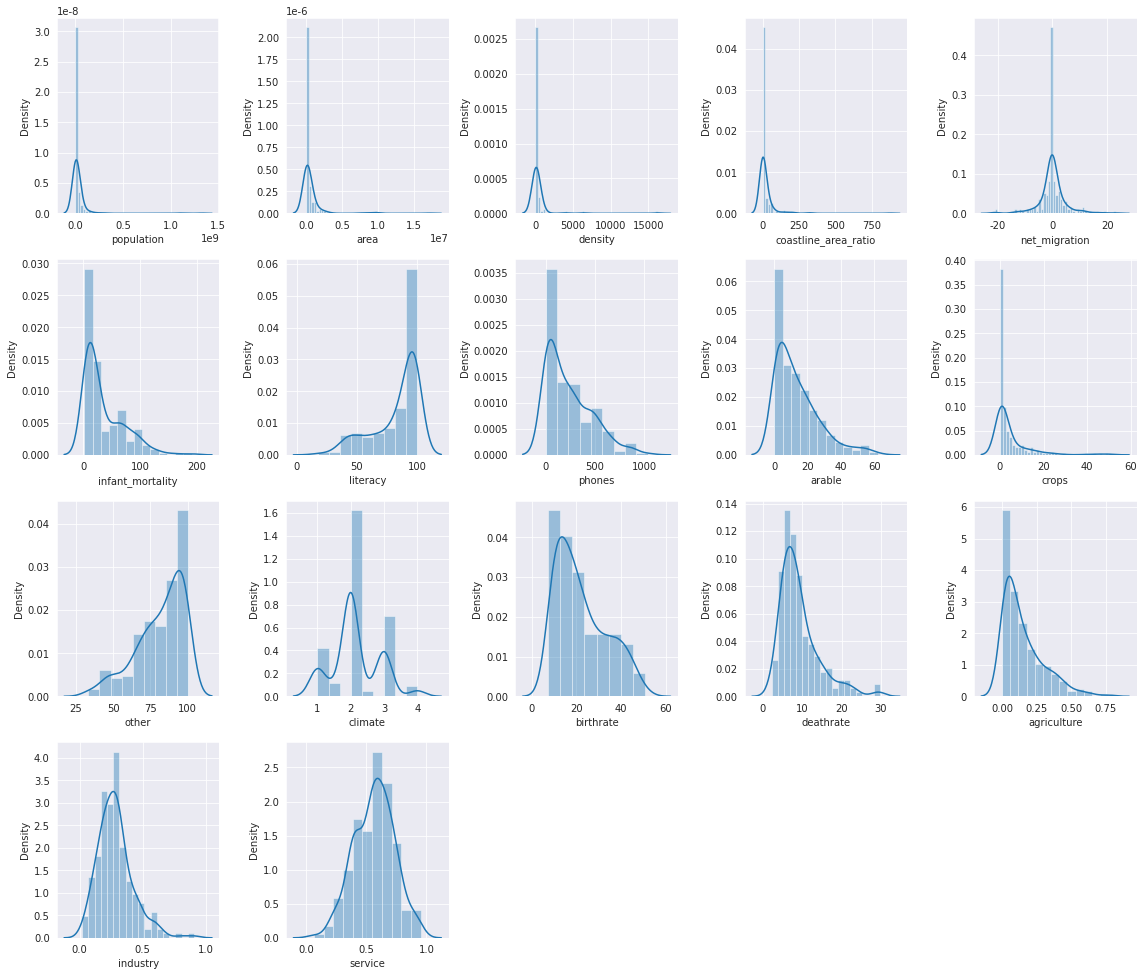

In [32]:
#Sequence diagram of eight variables

fig = plt.figure(figsize=(16,30))
features= ["population","area", "density", "coastline_area_ratio","net_migration","infant_mortality", "literacy", "phones", "arable","crops","other","climate","birthrate","deathrate","agriculture","industry","service"]
for i in range(len(features)):
    fig.add_subplot(9, 5, i+1)
    sns.distplot(data[features[i]])
plt.tight_layout()
plt.show()

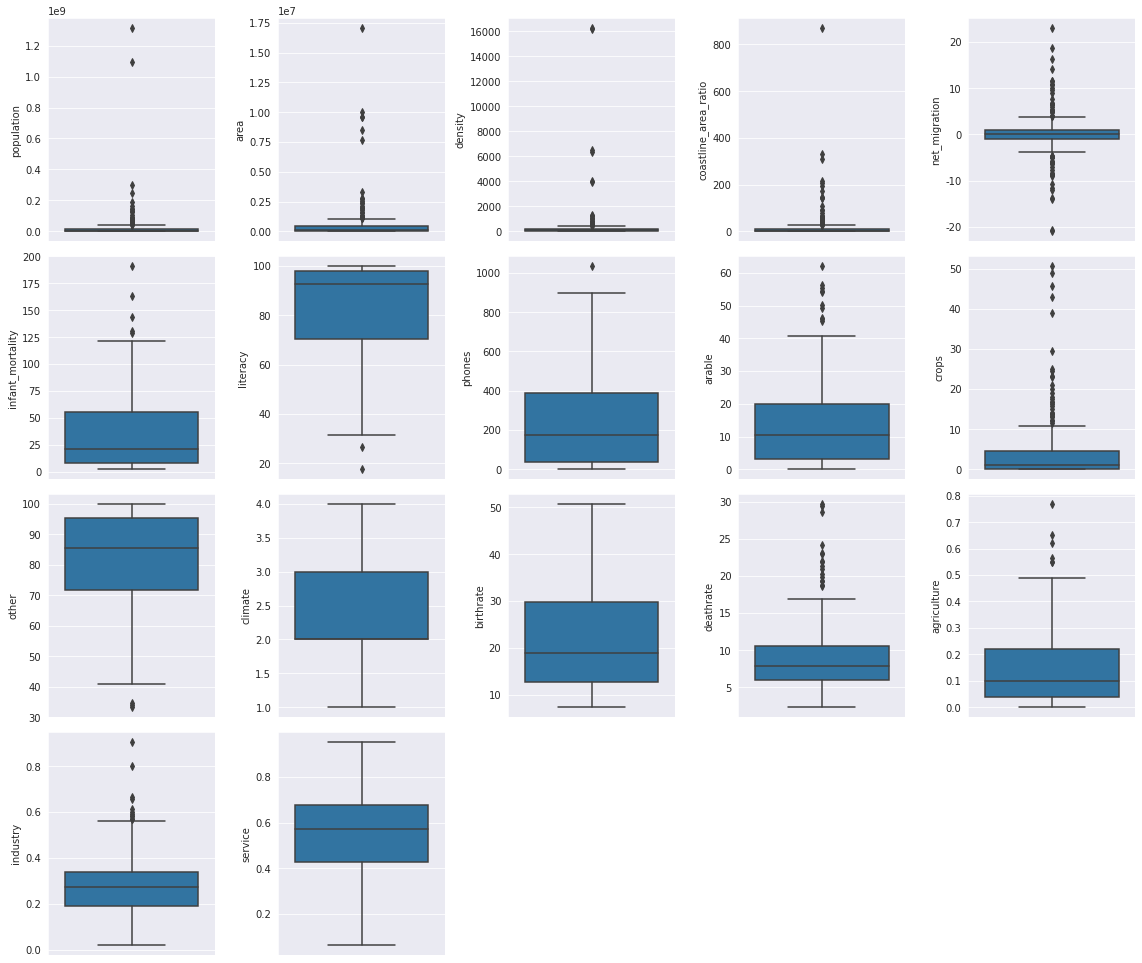

In [33]:
#boxplot
fig = plt.figure(figsize=(16,30))
features= ["population","area", "density", "coastline_area_ratio","net_migration","infant_mortality", "literacy", "phones", "arable","crops","other","climate","birthrate","deathrate","agriculture","industry","service"]

for i in range(len(features)):
    fig.add_subplot(9, 5, i+1)
    sns.boxplot(y=data[features[i]])
plt.tight_layout()
plt.show()

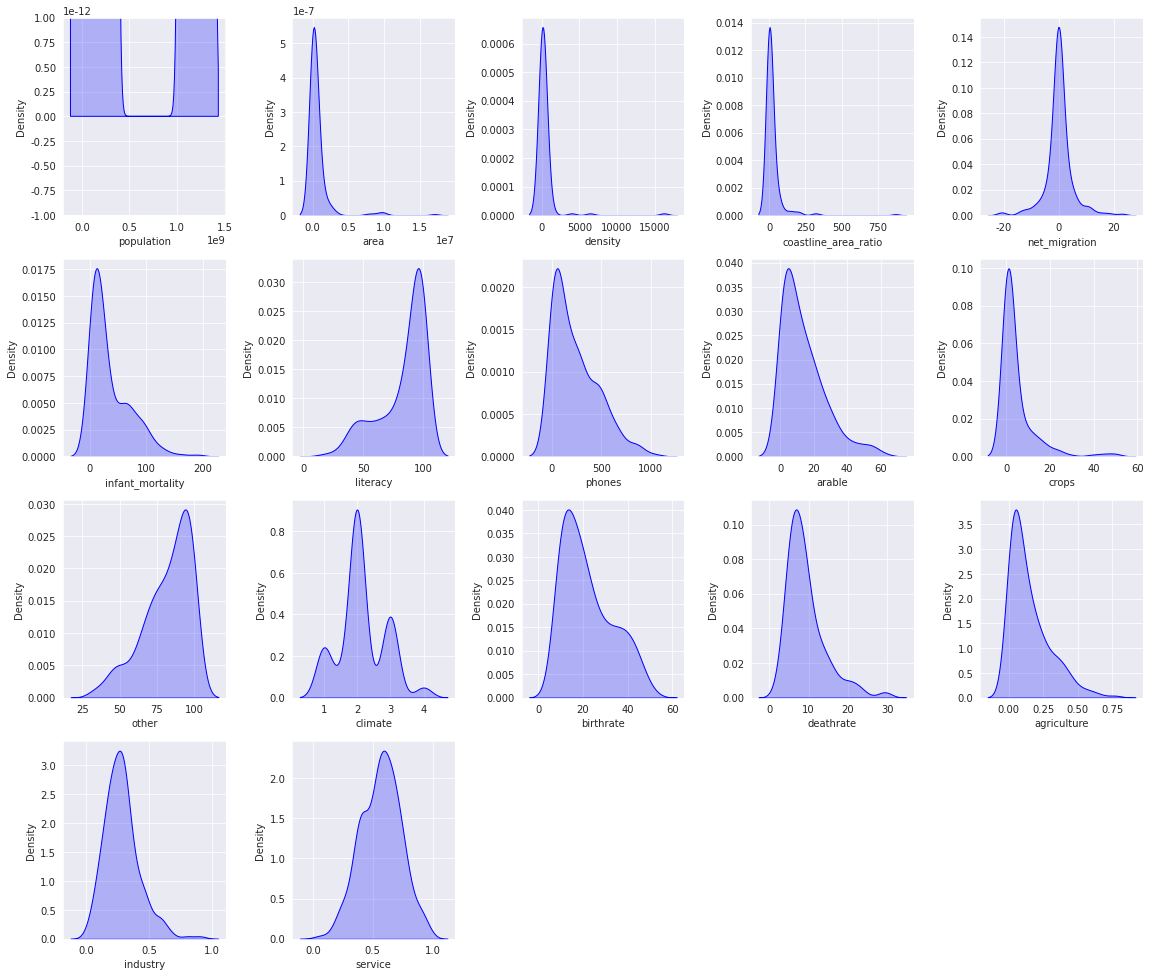

In [35]:
#kdeplot

fig = plt.figure(figsize=(16,30))
features= ["population","area", "density", "coastline_area_ratio","net_migration","infant_mortality", "literacy", "phones", "arable","crops","other","climate","birthrate","deathrate","agriculture","industry","service"]

for i in range(len(features)):
    fig.add_subplot(9, 5, i+1)
    sns.kdeplot(data[features[i]],color='blue',shade= True)
plt.tight_layout()
plt.show()

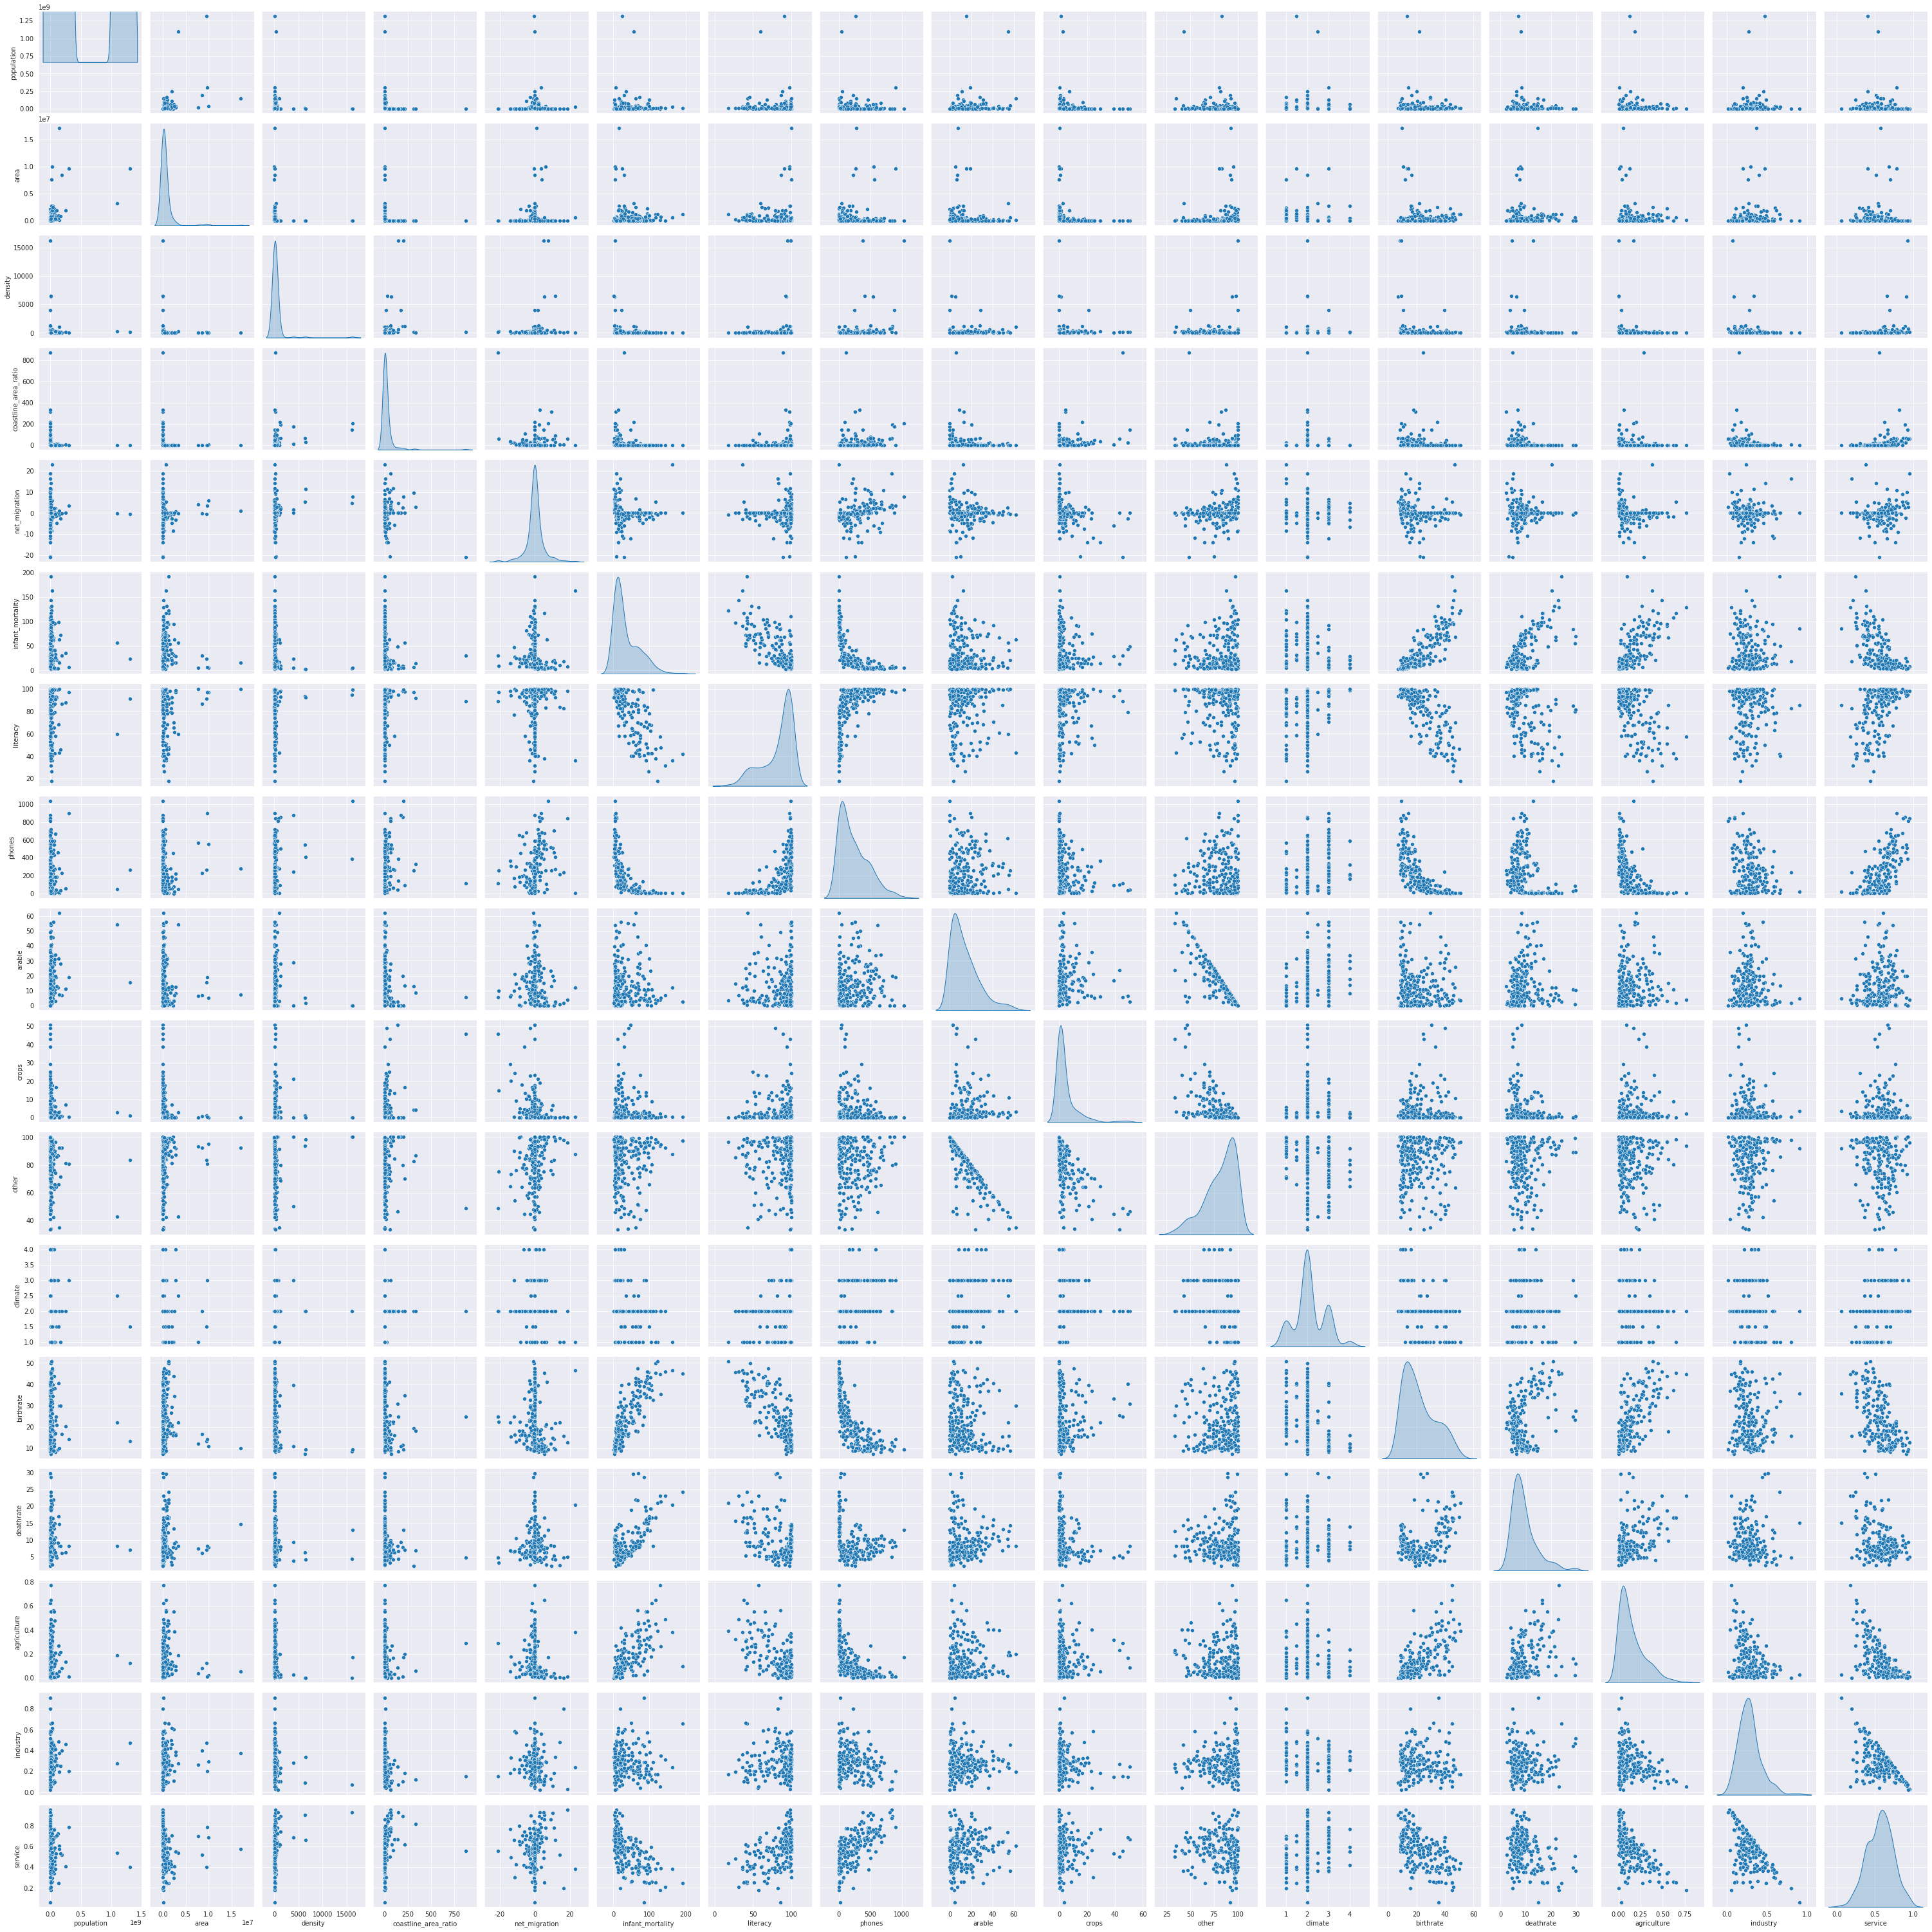

In [37]:
features= ["population","area", "density", "coastline_area_ratio","net_migration","infant_mortality", "literacy", "phones", "arable","crops","other","climate","birthrate","deathrate","agriculture","industry","service"]

 
sns.pairplot(data[features],diag_kind='kde')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <a list of 18 Text major ticklabel objects>)

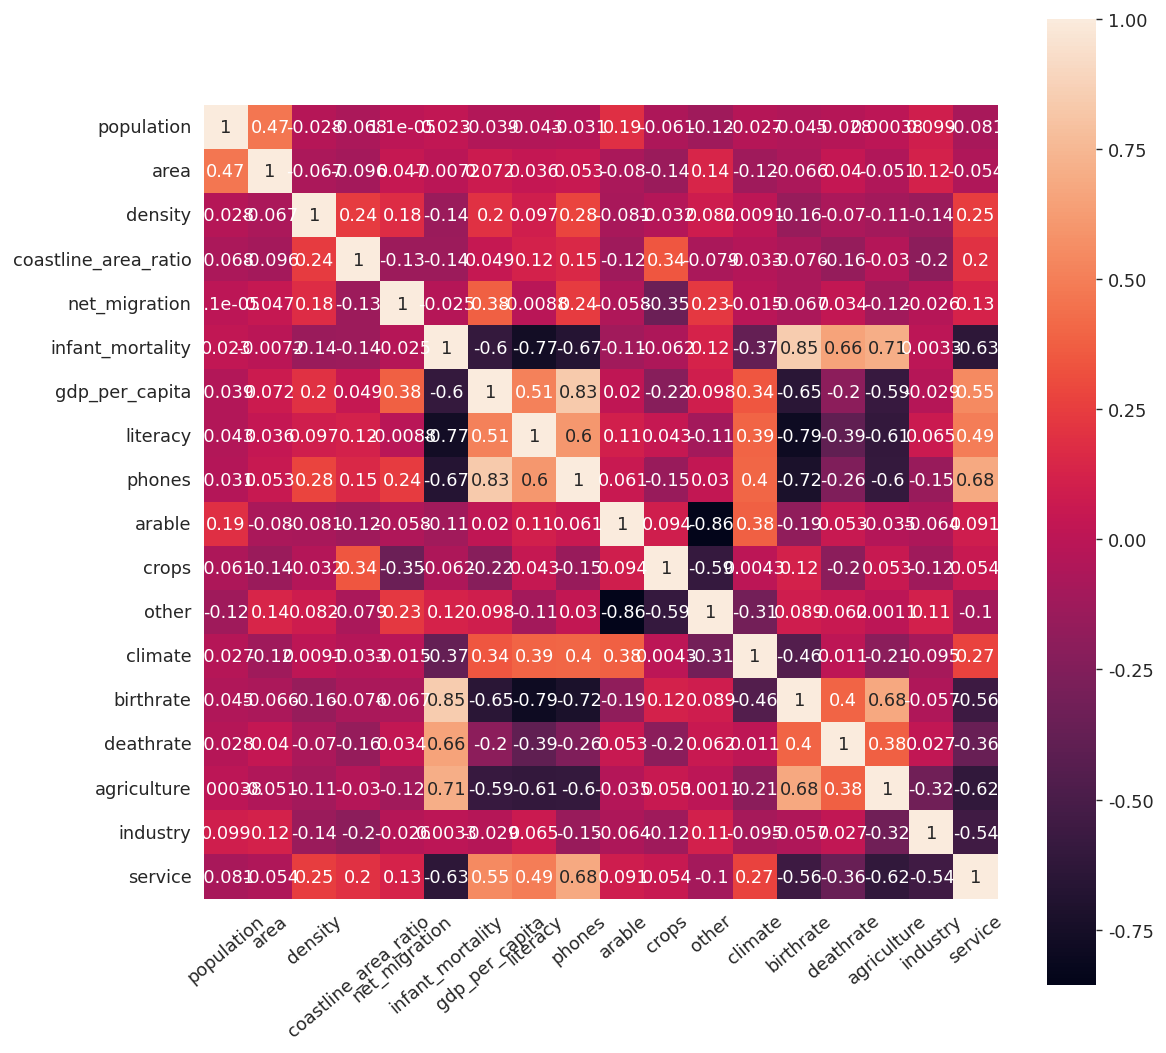

In [41]:
#Pearson's correlation coefficient heatmap
corr = plt.figure(figsize = (10,10),dpi=128)
corr= sns.heatmap(data.corr(),annot=True,square=True)
plt.xticks(rotation=40)

In [47]:
train, test = train_test_split(data, test_size=0.3, shuffle=True)
training_features= ["population","area", "density", "coastline_area_ratio","net_migration","infant_mortality", "literacy", "phones", "arable","crops","other","climate","birthrate","deathrate","agriculture","industry","service"]

target = 'gdp_per_capita'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [48]:
print(train_X.shape) 
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(158, 17)
(158,)
(69, 17)
(69,)


In [49]:
model1 = LinearRegression()
model1.fit(train_X, train_Y)
train_pred_Y = model1.predict(train_X)
test_pred_Y = model1.predict(test_X)

ValueError: ignored

In [50]:
from sklearn.metrics import r2_score

In [51]:
print('Training Score : ',model1.score(train_X,train_Y))
print(f'Test score : ',r2_score(test_pred_Y,test_Y))

ValueError: ignored

In [52]:
plt.figure(figsize=(18,9))
whole=model1.predict(data[training_features])
sns.regplot(x=data[target],y=whole) 

ValueError: ignored

<Figure size 1296x648 with 0 Axes>